In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


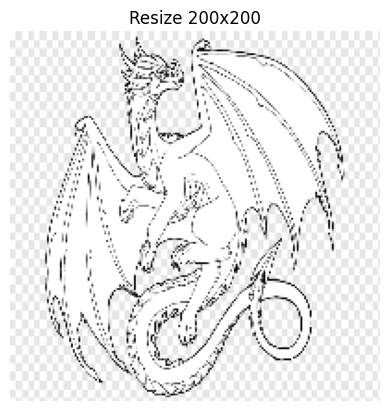

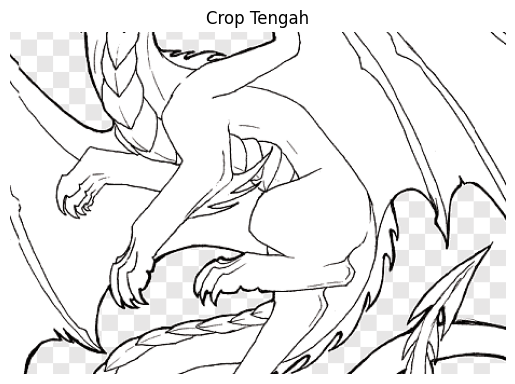

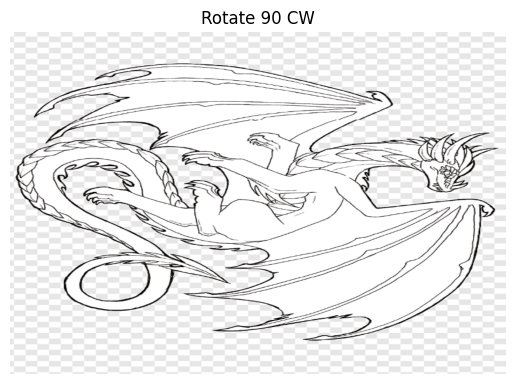

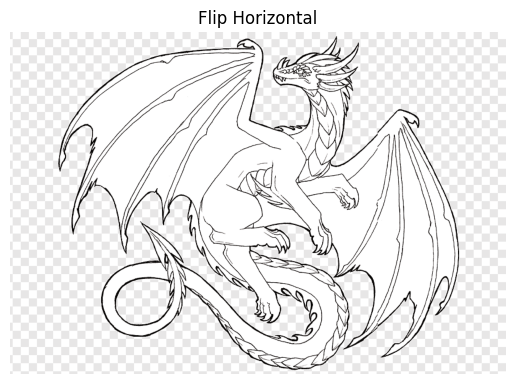

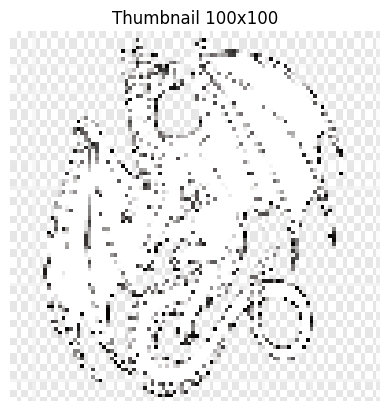

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Praktikum Pengolahan Citra_G.211.22.0123/dataset/Naga.png")
assert img is not None, "Gambar tidak ditemukan!"
h,w = img.shape[:2]

# Resize
resize = cv2.resize(img, (200,200))
# Crop (Ambil Tengah)
ch, cw = h//4, w//4
crop = img[ch:ch+h//2, cw:cw+w//2]
# Rotate 90 CW
rotasi = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
rotate = cv2.resize(rotasi, (w,h))
# Flip Horizontal
flip = cv2.flip(img, 1)

def show(title, im):
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.title(title); plt.axis('off'); plt.show()

for t, im in [("Resize 200x200", resize),
              ("Crop Tengah", crop),
              ("Rotate 90 CW", rotate),
               ("Flip Horizontal", flip)]:
  show(t, im)

# Thumbnail Generator
def thumbnail_generator(image, size=(20,20)):
  return cv2.resize(image, size)

thumb = thumbnail_generator(img, (100,100))
show("Thumbnail 100x100", thumb)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(title, im):
    """Menampilkan gambar dengan judul."""
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def transformasi_gambar(img, mode="translate", tx=0, ty=0, angle=0, scale=1.0, shear=0.0):

    h, w = img.shape[:2]

    if mode == "translate":
        # Geser gambar
        M = np.float32([[1, 0, tx], [0, 1, ty]])
        result = cv2.warpAffine(img, M, (w, h))

    elif mode == "rotate":
        # Rotasi gambar
        M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1.0)
        result = cv2.warpAffine(img, M, (w, h))

    elif mode == "scale":
        # Skala (resize)
        result = cv2.resize(img, (int(w * scale), int(h * scale)))

    elif mode == "shear":
        # Kemiringan gambar
        M = np.float32([[1, shear, 0],
                        [shear, 1, 0]])
        result = cv2.warpAffine(img, M, (w, h))

    else:
        raise ValueError("Mode tidak dikenal! Gunakan: 'translate', 'rotate', 'scale', atau 'shear'.")

    return result

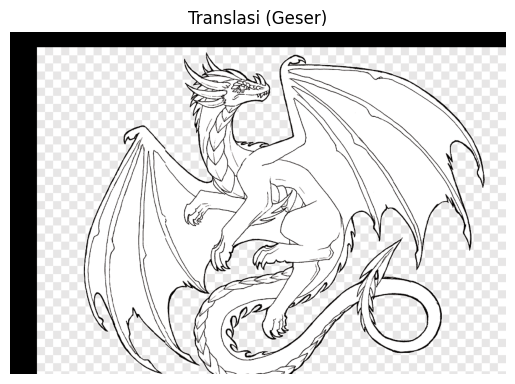

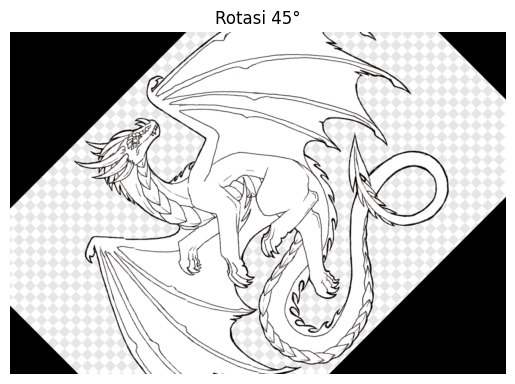

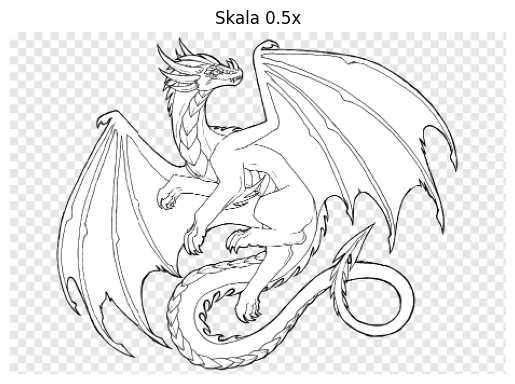

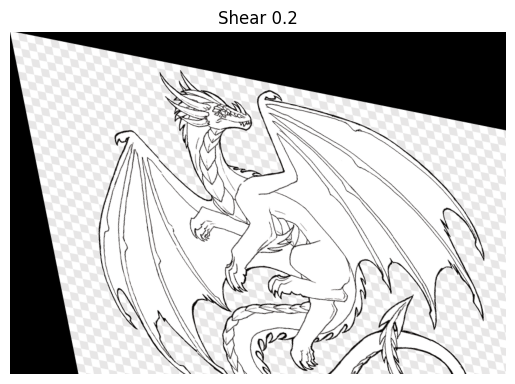

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Praktikum Pengolahan Citra_G.211.22.0123/dataset/Naga.png")
assert img is not None, "Gambar tidak ditemukan!"

# Uji semua mode
hasil_translate = transformasi_gambar(img, mode="translate", tx=50, ty=30)
hasil_rotate = transformasi_gambar(img, mode="rotate", angle=45)
hasil_scale = transformasi_gambar(img, mode="scale", scale=0.5)
hasil_shear = transformasi_gambar(img, mode="shear", shear=0.2)

# Tampilkan hasil
show("Translasi (Geser)", hasil_translate)
show("Rotasi 45°", hasil_rotate)
show("Skala 0.5x", hasil_scale)
show("Shear 0.2", hasil_shear)